The Most Common Upsets in March Madness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
seeds = pd.read_csv('TourneySeeds.csv')
seeds.head(3)

,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228


In [3]:
games = pd.read_csv('TourneyCompactResults.csv')
games.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0


In [4]:
allgames = games.merge(seeds, how='inner', left_on=['Wteam', 'Season'], right_on=['Team', 'Season'])
allgames.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed,Team
0,1985,136,1116,63,1234,54,N,0,X09,1116
1,1985,136,1120,59,1345,58,N,0,Z11,1120
2,1985,138,1120,66,1242,64,N,0,Z11,1120


In [5]:
allgames = allgames.merge(seeds, how='inner', left_on=['Lteam', 'Season'], right_on=['Team', 'Season'])
allgames.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242


In [6]:
#####split strings to get the seed



allgames['Winning Seed'] = allgames['Seed_x'].str[1:]
allgames['Losing Seed'] = allgames['Seed_y'].str[1:]
allgames.tail(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed
2047,2016,137,1458,47,1338,43,N,0,W07,1458,W10,1338,07,10
2048,2016,139,1458,66,1462,63,N,0,W07,1458,W02,1462,07,02
2049,2016,137,1462,71,1451,53,N,0,W02,1462,W15,1451,02,15


In [7]:
def change(ch):
    if len(ch) > 2:
        return ch[:2]
    else:
        return ch


allgames['Winner'] = allgames['Winning Seed'].apply(change)
allgames['Loser'] = allgames['Losing Seed'].apply(change)

In [8]:
allgames['Winner'].sort_values().tail(30)

403     15
1767    15
1772    15
1021    15
1829    15
1828    15
795     15
2020    15
1328    16
1584    16
1920    16
1851    16
1849    16
1649    16
1072    16
1650    16
1719    16
1520    16
1392    16
1983    16
1916    16
1986    16
1456    16
1136    16
1784    16
1782    16
1264    16
1008    16
1200    16
1716    16
Name: Winner, dtype: object

In [9]:
allgames['Winner'] =  allgames['Winner'].astype('int')
allgames['Loser'] =  allgames['Loser'].astype('int')

allgames.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 16 columns):
Season          2050 non-null int64
Daynum          2050 non-null int64
Wteam           2050 non-null int64
Wscore          2050 non-null int64
Lteam           2050 non-null int64
Lscore          2050 non-null int64
Wloc            2050 non-null object
Numot           2050 non-null int64
Seed_x          2050 non-null object
Team_x          2050 non-null int64
Seed_y          2050 non-null object
Team_y          2050 non-null int64
Winning Seed    2050 non-null object
Losing Seed     2050 non-null object
Winner          2050 non-null int32
Loser           2050 non-null int32
dtypes: int32(2), int64(9), object(5)
memory usage: 256.2+ KB


In [10]:
allgames.groupby('Winner')['Wteam'].count()

Winner
1     429
2     307
3     230
4     198
5     142
6     144
7     114
8      93
9      72
10     82
11     81
12     70
13     33
14     24
15      9
16     22
Name: Wteam, dtype: int64

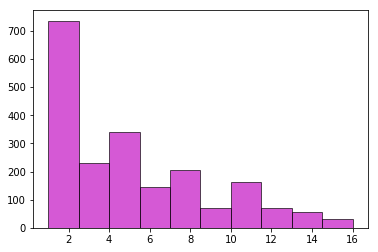

In [11]:

plt.hist(allgames['Winner'], color='m', alpha=0.65, edgecolor='black')

plt.style.use('ggplot')

In [12]:
allgames['game number'] = allgames.groupby(['Season', 'Winner'])['Winner'].transform('rank')

In [13]:
#get rid of the play in games
allgames[allgames['Winner'] == 16].head(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number
1008,2001,134,1322,71,1457,67,N,0,Y16a,1322,Y16b,1457,16a,16b,16,16,1.5
1072,2002,134,1373,81,1108,77,N,0,W16b,1373,W16a,1108,16b,16a,16,16,5.5
1136,2003,134,1421,92,1411,84,N,1,X16b,1421,X16a,1411,16b,16a,16,16,7.5
1200,2004,134,1197,72,1250,57,N,0,Z16a,1197,Z16b,1250,16a,16b,16,16,2.5
1264,2005,134,1324,79,1105,69,N,0,Z16b,1324,Z16a,1105,16b,16a,16,16,3.0
1328,2006,134,1284,71,1214,49,N,0,Y16b,1284,Y16a,1214,16b,16a,16,16,6.0
1392,2007,134,1310,77,1197,69,N,0,Z16b,1310,Z16a,1197,16b,16a,16,16,7.0
1456,2008,134,1291,69,1164,60,N,0,W16b,1291,W16a,1164,16b,16a,16,16,6.0
1520,2009,134,1287,58,1106,43,N,0,Y16b,1287,Y16a,1106,16b,16a,16,16,6.5
1584,2010,134,1115,61,1457,44,N,0,X16a,1115,X16b,1457,16a,16b,16,16,2.0


In [14]:
allgames = allgames[(allgames['Winner'] != 16) & (allgames['Loser'] != 16)]

In [15]:

allgames['game number'] = allgames.sort_values(['Season', 'Daynum']).groupby(['Season']).cumcount()+1
allgames.sort_values(['Season', 'Daynum']).head(70)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2
8,1985,136,1229,58,1425,55,N,0,Y09,1229,Y08,1425,09,08,9,8,3
9,1985,136,1242,49,1325,38,N,0,Z03,1242,Z14,1325,03,14,3,14,4
10,1985,136,1246,66,1449,58,N,0,X12,1246,X05,1449,12,05,12,5,5
12,1985,136,1256,78,1338,54,N,0,Y05,1256,Y12,1338,05,12,5,12,6
14,1985,136,1260,59,1233,58,N,0,W04,1260,W13,1233,04,13,4,13,7
16,1985,136,1314,76,1292,57,N,0,Z02,1314,Z15,1292,02,15,2,15,8
19,1985,136,1323,79,1333,70,N,0,Z07,1323,Z10,1333,07,10,7,10,9
20,1985,136,1326,75,1235,64,N,0,Y04,1326,Y13,1235,04,13,4,13,10


In [16]:
def rounds(g):
    if g <= 32:
        return 1
    elif g <= 48:
        return 2
    elif g <= 56:
        return 3
    elif g <= 60:
        return 4
    else:
        return 5

In [17]:
allgames['Round'] = allgames['game number'].apply(rounds)

In [18]:
allgames.head(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1,1
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2,1
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242,11,03,11,3,29,1
4,1985,138,1207,63,1396,46,N,0,W01,1207,W08,1396,01,08,1,8,30,1
5,1985,143,1207,65,1260,53,N,0,W01,1207,W04,1260,01,04,1,4,45,2
6,1985,145,1207,60,1210,54,N,0,W01,1207,W02,1210,01,02,1,2,53,3
7,1985,152,1207,77,1385,59,N,0,W01,1207,X01,1385,01,01,1,1,57,4
8,1985,136,1229,58,1425,55,N,0,Y09,1229,Y08,1425,09,08,9,8,3,1
9,1985,136,1242,49,1325,38,N,0,Z03,1242,Z14,1325,03,14,3,14,4,1
10,1985,136,1246,66,1449,58,N,0,X12,1246,X05,1449,12,05,12,5,5,1


In [19]:
wrounds = allgames.groupby(['Round', 'Winner']).agg({'Wteam' : 'count'})

In [20]:
wrounds.reset_index(inplace=True)
wrounds.head(20)

,Round,Winner,Wteam
0,1,1,33
1,1,2,142
2,1,3,120
3,1,4,115
4,1,5,94
5,1,6,87
6,1,7,80
7,1,8,67
8,1,9,64
9,1,10,55


In [21]:
lrounds = allgames.groupby(['Round', 'Loser']).agg({'Lteam' : 'count'})


In [22]:
lrounds.reset_index(inplace=True)
lrounds.head()

,Round,Loser,Lteam
0,1,1,3
1,1,2,14
2,1,3,27
3,1,4,37
4,1,5,53


In [23]:
wincounts = pd.merge(wrounds, lrounds, how='outer', left_on=['Round', 'Winner'], right_on=['Round', 'Loser'])


In [24]:
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam
0,1,1.0,33.0,1.0,3.0
1,1,2.0,142.0,2.0,14.0
2,1,3.0,120.0,3.0,27.0
3,1,4.0,115.0,4.0,37.0
4,1,5.0,94.0,5.0,53.0
5,1,6.0,87.0,6.0,50.0
6,1,7.0,80.0,7.0,66.0
7,1,8.0,67.0,8.0,77.0
8,1,9.0,64.0,9.0,84.0
9,1,10.0,55.0,10.0,84.0


In [25]:
wincounts['Lteam'] = wincounts['Lteam'].fillna(value = 0)
wincounts['games'] = wincounts['Wteam'] + wincounts['Lteam']
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam,games
0,1,1.0,33.0,1.0,3.0,36.0
1,1,2.0,142.0,2.0,14.0,156.0
2,1,3.0,120.0,3.0,27.0,147.0
3,1,4.0,115.0,4.0,37.0,152.0
4,1,5.0,94.0,5.0,53.0,147.0
5,1,6.0,87.0,6.0,50.0,137.0
6,1,7.0,80.0,7.0,66.0,146.0
7,1,8.0,67.0,8.0,77.0,144.0
8,1,9.0,64.0,9.0,84.0,148.0
9,1,10.0,55.0,10.0,84.0,139.0


In [26]:
wincounts['Win Percentage'] = wincounts['Wteam'] / wincounts['games'] 

In [27]:
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam,games,Win Percentage
0,1,1.0,33.0,1.0,3.0,36.0,0.916667
1,1,2.0,142.0,2.0,14.0,156.0,0.910256
2,1,3.0,120.0,3.0,27.0,147.0,0.816327
3,1,4.0,115.0,4.0,37.0,152.0,0.756579
4,1,5.0,94.0,5.0,53.0,147.0,0.639456
5,1,6.0,87.0,6.0,50.0,137.0,0.635036
6,1,7.0,80.0,7.0,66.0,146.0,0.547945
7,1,8.0,67.0,8.0,77.0,144.0,0.465278
8,1,9.0,64.0,9.0,84.0,148.0,0.432432
9,1,10.0,55.0,10.0,84.0,139.0,0.395683


In [28]:
wincounts['Seed Number'] = wincounts['Winner']

In [29]:
## omit the 5th round
wincounts = wincounts[wincounts['Round'] != 5]

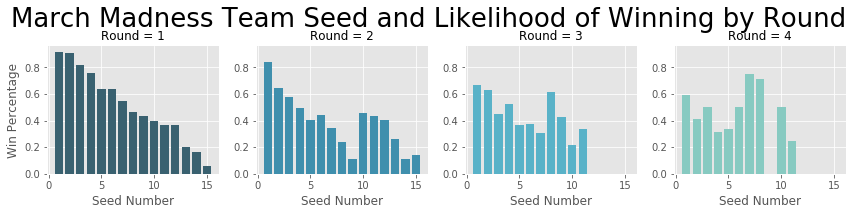

In [30]:
g = sns.FacetGrid(wincounts, col='Round', hue='Round', palette = 'GnBu_d')

g = g.map(plt.bar, 'Seed Number', "Win Percentage")

plt.subplots_adjust(top=0.8)
g.fig.suptitle('March Madness Team Seed and Likelihood of Winning by Round', fontsize=26) 
plt.savefig("March Madness Rounds.png")

In [31]:
allgames['Difference'] = allgames['Winner'] - allgames['Loser']

def upse(diff):
    if diff > 2:
        return 1
    else:
        return 0

allgames['Upset'] =  allgames['Difference'].apply(upse)

In [32]:
allgames.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round,Difference,Upset
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1,1,1,0
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2,1,5,1
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242,11,03,11,3,29,1,8,1
4,1985,138,1207,63,1396,46,N,0,W01,1207,W08,1396,01,08,1,8,30,1,-7,0
5,1985,143,1207,65,1260,53,N,0,W01,1207,W04,1260,01,04,1,4,45,2,-3,0


In [33]:
###concat variable for each upset matchup for each roound

allgames['Matchup'] = allgames[['Winner', 'Loser']].min(axis=1).astype(str)  + 'vs' + allgames[['Winner', 'Loser']].max(axis=1).astype(str)

In [34]:
allgames.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,...,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round,Difference,Upset,Matchup
0,1985,136,1116,63,1234,54,N,0,X09,1116,...,1234,09,08,9,8,1,1,1,0,8vs9
1,1985,136,1120,59,1345,58,N,0,Z11,1120,...,1345,11,06,11,6,2,1,5,1,6vs11
2,1985,138,1120,66,1242,64,N,0,Z11,1120,...,1242,11,03,11,3,29,1,8,1,3vs11
4,1985,138,1207,63,1396,46,N,0,W01,1207,...,1396,01,08,1,8,30,1,-7,0,1vs8
5,1985,143,1207,65,1260,53,N,0,W01,1207,...,1260,01,04,1,4,45,2,-3,0,1vs4


In [35]:
##aggregate number of games and upsets
upsetdfsum = allgames.groupby(['Matchup']).agg({"Upset" : "sum"}).reset_index()
upsetdfsum.head()

,Matchup,Upset
0,10vs11,0
1,10vs14,0
2,10vs15,0
3,11vs11,0
4,11vs14,0


In [36]:
upsetdfcount = allgames.groupby(['Matchup']).agg({"Upset" : "count"}).reset_index()
upsetdfcount.head()

,Matchup,Upset
0,10vs11,3
1,10vs14,1
2,10vs15,5
3,11vs11,7
4,11vs14,5


In [37]:
upsetdf = pd.merge(upsetdfcount, upsetdfsum, how='inner', on='Matchup')

In [38]:
upsetdf.tail()


,Matchup,Upset_x,Upset_y
71,8vs11,1,0
72,8vs12,1,1
73,8vs13,1,0
74,8vs9,128,0
75,9vs13,1,0


In [39]:
upsetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 3 columns):
Matchup    76 non-null object
Upset_x    76 non-null int64
Upset_y    76 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [40]:

upsetdf = upsetdf[upsetdf['Upset_y'] != 0]
upsetdf['Upset Percentage'] = upsetdf['Upset_y'] / upsetdf['Upset_x']
upsetdf


,Matchup,Upset_x,Upset_y,Upset Percentage
10,1vs10,6,1,0.166667
11,1vs11,6,3,0.500000
16,1vs4,58,17,0.293103
17,1vs5,43,7,0.162791
18,1vs6,11,3,0.272727
19,1vs7,6,1,0.166667
20,1vs8,66,13,0.196970
21,1vs9,65,5,0.076923
22,2vs10,45,18,0.400000
23,2vs11,14,1,0.071429


In [41]:
#upsetdf['Upset_x'] = upsetdf['Upset_x'].rename('Number of Occurances', axis='columns')
upsetdf.rename(columns={'Upset_x': 'Number of Occurances'}, inplace=True)
upsetdf.drop('Upset_y', axis=1, inplace=True)
upsetdf.head()

,Matchup,Number of Occurances,Upset Percentage
10,1vs10,6,0.166667
11,1vs11,6,0.500000
16,1vs4,58,0.293103
17,1vs5,43,0.162791
18,1vs6,11,0.272727


In [43]:
#export
upsetdf.to_csv("March Madness Upsets List.csv")